**Importing the Libraries**

In [1]:
#Here I have used Logistic Regression algorithm for classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Reading the dataset**

In [2]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Using Describe method to show content**

In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#With Example
sr1 = pd.Series([90,10,5,30,80,25,20,20,85,65,11,28,22,45,6,55,88,11,99])
sr1.describe()

count    19.000000
mean     41.842105
std      32.724885
min       5.000000
25%      15.500000
50%      28.000000
75%      72.500000
max      99.000000
dtype: float64

**Checking for if there is any missing values**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Box Plot**

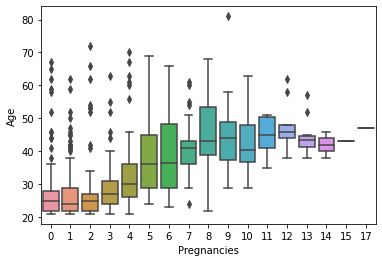

In [8]:
sns.boxplot(x='Pregnancies', y='Age', data=dataset)

**Scatter plot**

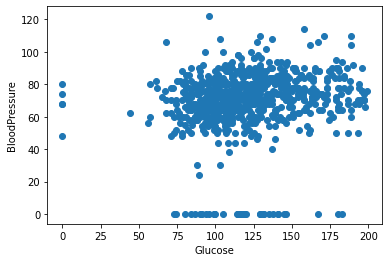

In [9]:
plt.scatter(dataset['Glucose'],dataset['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

**Initiating the variables**

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

**Splitting dataset into training and testing dataset**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling to scale the data**

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
y_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

**Training the model using Logistic Regression Algorithm**

In [14]:
from sklearn.linear_model import LogisticRegression
classfr = LogisticRegression()
classfr.fit(X_train, y_train)

LogisticRegression()

In [15]:
#Testing The Model
y_pred = classfr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

**Checking the Performance**

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100


[[79 20]
 [18 37]]


75.32467532467533

**Prediction for New Values**

In [17]:
output = classfr.predict(sc.transform([[3,140,80,120,55.2,0.12,4,34]]))
output

array([0])

In [18]:
output = classfr.predict(sc.transform([[2,140,30,140,65.2,0.312,44,23]]))
output

array([1])

**Prediction by taking input from User for new values**

In [20]:
print("Please enter the corresponding details :")
Pregnancies = int(input("Pregnancies :"))
Glucose = float(input("Glucose :"))
BloodPressure = float(input("BloodPressure :"))
SkinThickness = float(input("SkinThickness :"))
Insulin = float(input("Insulin :"))
BMI = float(input("BMI :"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction :"))
Age = float(input("Age :"))


output = classfr.predict([[Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, Age	]])
print("Here prediction wise '1' considered as Patient is Positive for diabetes and '0' will be Negative")
print("The predicion of Diabates diagnosis acc. to data is {} on the basis of Pregnancies {} , 	Glucose {} , BloodPressure {},	SkinThickness {},Insulin {},	BMI {},	DiabetesPedigreeFunction {} and Age {} ".format(output[0] if output else "No data",Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, Age))	

Please enter the corresponding details :
Pregnancies :2
Glucose :35
BloodPressure :25
SkinThickness :3.5
Insulin :1
BMI :28.3
DiabetesPedigreeFunction :4.55
Age :22
Here prediction wise '1' considered as Patient is Positive for diabetes and '0' will be Negative
The predicion of Diabates diagnosis acc. to data is 1 on the basis of Pregnancies 2 , 	Glucose 35.0 , BloodPressure 25.0,	SkinThickness 3.5,Insulin 1.0,	BMI 28.3,	DiabetesPedigreeFunction 4.55 and Age 22.0 


In [25]:
print("Please enter the corresponding details :")
Pregnancies = int(input("Pregnancies :"))
Glucose = float(input("Glucose :"))
BloodPressure = float(input("BloodPressure :"))
SkinThickness = float(input("SkinThickness :"))
Insulin = float(input("Insulin :"))
BMI = float(input("BMI :"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction :"))
Age = float(input("Age :"))


output = classfr.predict([[Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, Age	]])
print("Here prediction wise '1' considered as Patient is Positive for diabetes and '0' will be Negative")
print("The predicion of Diabates diagnosis acc. to data is {} on the basis of Pregnancies {} , 	Glucose {} , BloodPressure {},	SkinThickness {},	Insulin {},	BMI {},	DiabetesPedigreeFunction {} and Age {} "
.format(output[0] if output else "No data",Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, Age))

Please enter the corresponding details :
Pregnancies :8
Glucose :1
BloodPressure :122
SkinThickness :2
Insulin :5
BMI :45
DiabetesPedigreeFunction :5
Age :36
Here prediction wise '1' considered as Patient is Positive for diabetes and '0' will be Negative
The predicion of Diabates diagnosis acc. to data is 1 on the basis of Pregnancies 8 , 	Glucose 1.0 , BloodPressure 122.0,	SkinThickness 2.0,	Insulin 5.0,	BMI 45.0,	DiabetesPedigreeFunction 5.0 and Age 36.0 
